In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import os
import re

In [3]:
def getTestIdFromFilename(filename):
    return  int(re.findall(r'\d+', filename)[0])


In [44]:
worktime = 4 #[sek]

df_tests = pd.read_csv("/home/julle/projects/SearchWing/Tests/20201119_WifiTestSetup/wifibroadcast-test/testids.csv")
df_tests['testid'] = pd.to_numeric(df_tests['testid'])
df_testsJoined = df_tests.copy() 

In [45]:

csvs_ByTestId = {}
path="/home/julle/projects/SearchWing/Tests/20201119_WifiTestSetup/wfb-test-results/InHousePhil20201120"
csvs = glob(os.path.join(path,"*.csv"))
maxValuesAll = []
for oneCsv in csvs:
    df_debug = pd.read_csv(oneCsv)     
    df_debug = df_debug.drop([0]) #delete first line due to error

    filename = os.path.basename(oneCsv)
    testId = getTestIdFromFilename(filename)
    
    df_maxValues = pd.DataFrame(df_debug.max()).transpose()
    df_maxValues = df_maxValues.drop('stamp', 1)
    df_maxValues['testid'] = (testId)

    maxValuesAll.append(df_maxValues)

df_maxValuesAll = pd.concat(maxValuesAll)

df_testsJoined = pd.merge(df_testsJoined, df_maxValuesAll,  how='left', on='testid')

In [46]:
nettoDataFiles = glob(os.path.join(path,"*.data"))
testIds = []
sizesBits = []
for oneNettoDataFile in nettoDataFiles:
    filename = os.path.basename(oneNettoDataFile)
    testIds.append(getTestIdFromFilename(filename))
    sizesBits.append((os.path.getsize(oneNettoDataFile)*8)/worktime) # convert to Bit/s
df_nettoDataSize = pd.DataFrame(data={'testid':testIds, 'nettoDataSize' : sizesBits})

df_testsJoined = pd.merge(df_testsJoined, df_nettoDataSize,  how='left', on='testid')


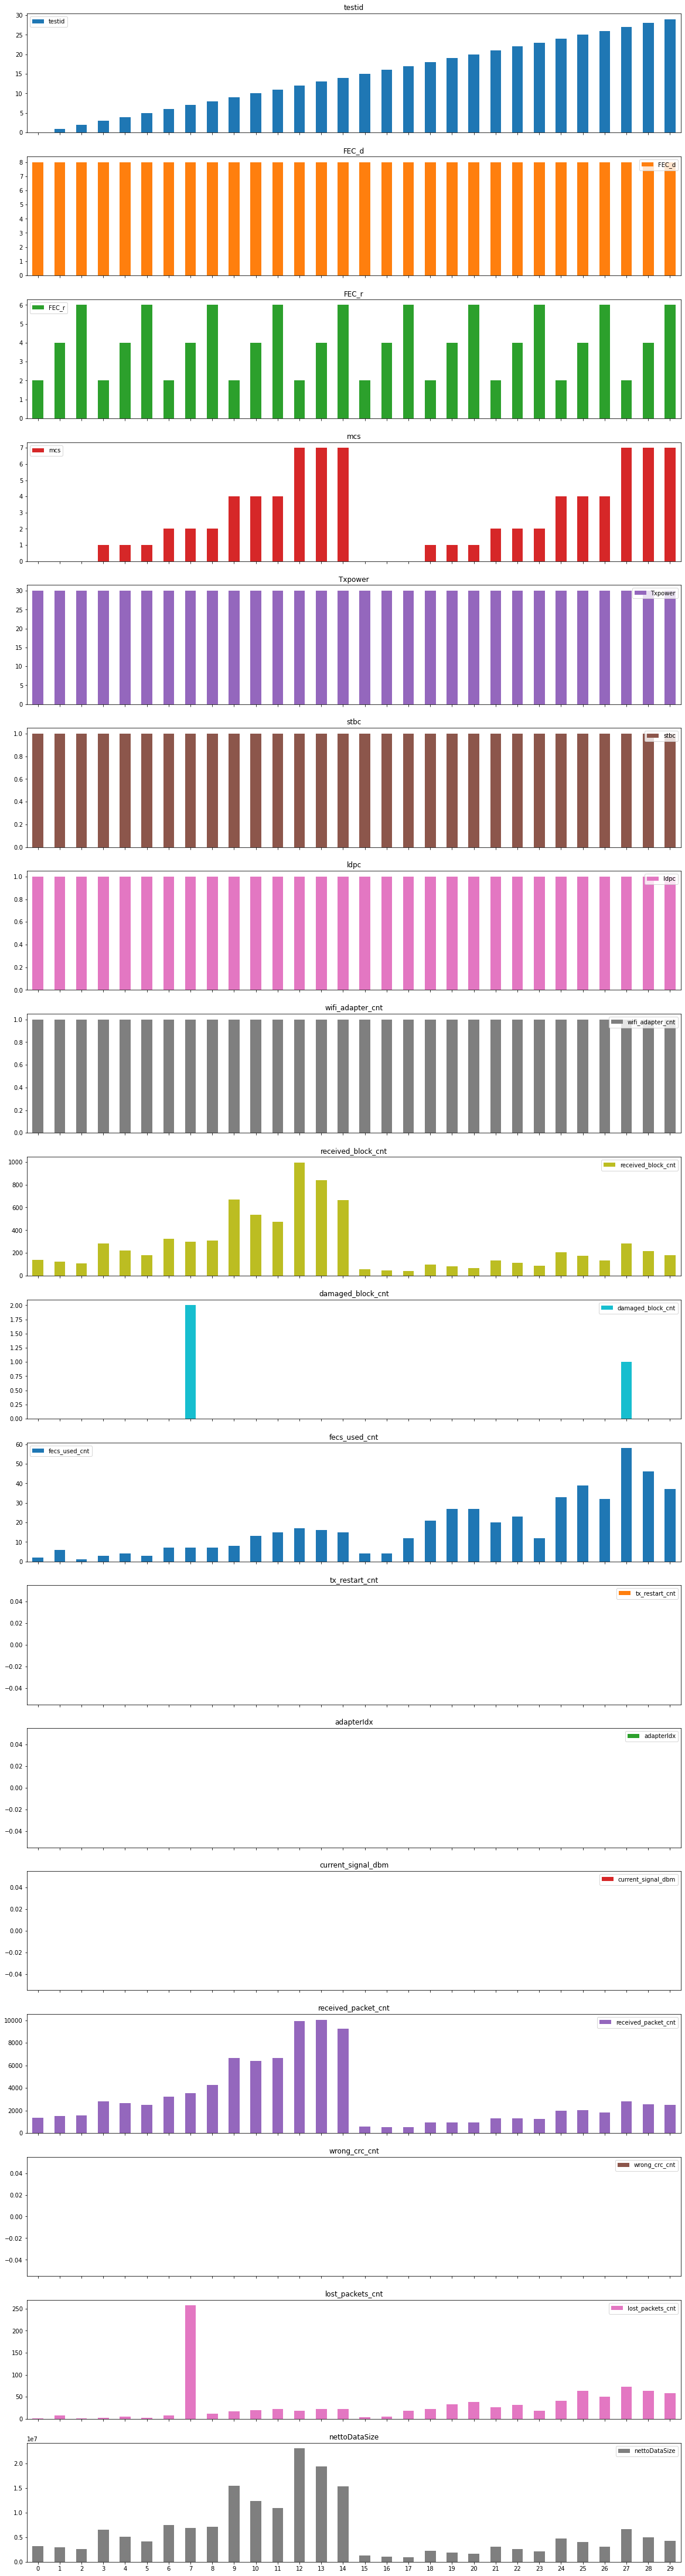

In [47]:
ax = df_testsJoined.plot.bar(rot=0, subplots=True,figsize=(20,80))

KeyError: 'testids'